In [17]:
import numpy as np
import os
import pandas as pd

# Core scverse libraries
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt


In [2]:
#set working directory

print("Previous Working Directory:", os.getcwd())

# Change the current working directory (replace with an actual directory on your system)
new_directory = "/Users/florachen/bioinformatics/final_project/mm_blood_10x/"
os.chdir(new_directory)

print("Current Working Directory:",new_directory)


Previous Working Directory: /Users/florachen/bioinformatics/final_project/scripts
Current Working Directory: /Users/florachen/bioinformatics/final_project/mm_blood_10x/


In [3]:
# Load the metadata
metadata_path = "/Users/florachen/bioinformatics/final_project/mm_blood_10x/metadata.xlsx"
metadata = pd.read_excel(metadata_path)

# Base folder containing the data
base_dir = "/Users/florachen/bioinformatics/final_project/mm_blood_10x"

#read the files (matrix.mtx.gz, barcodes.tsv.gz, features.tsv.gz)
#add the directory of where mtx, barcodes, and feature files are stored
metadata["mtx_path"] = metadata["sample_id"].apply(lambda sample: os.path.join(base_dir, sample, "mtx")) #not only write in the mtx file! but all three files

print(metadata.head(6))

         sample_id  batch genotype time_point  \
0  blood_12w_KO_01      1       KO     12w WD   
1  blood_12w_KO_02      2       KO     12w WD   
2  blood_12w_WT_01      1       WT     12w WD   
3  blood_12w_WT_02      2       WT     12w WD   
4   blood_ss_KO_B6      3       KO         ss   
5   blood_ss_WT_B6      3       WT         ss   

                                            mtx_path  
0  /Users/florachen/bioinformatics/final_project/...  
1  /Users/florachen/bioinformatics/final_project/...  
2  /Users/florachen/bioinformatics/final_project/...  
3  /Users/florachen/bioinformatics/final_project/...  
4  /Users/florachen/bioinformatics/final_project/...  
5  /Users/florachen/bioinformatics/final_project/...  


adatas={}
for _, row in metadata.iterrows():
    sample_id = row["sample_id"]
    batch = row["batch"]
    genotype = row["genotype"]
    mtx_path = row["mtx_path"]  # Path to mtx folder

    adatas[sample_id] = sc.read_10x_mtx(mtx_path, make_unique = True)
 
adata = ad.concat(adatas, label="sample")
adata.obs_names_make_unique()
print(adata.obs["sample"].value_counts())
print(adata.var.head(6))

In [4]:
#gpt corrected version
# Create a dictionary to store individual AnnData objects
adatas = {}

for _, row in metadata.iterrows():
    sample_id = row["sample_id"]
    batch = row["batch"]
    genotype = row["genotype"]
    state =row ["time_point"]
    mtx_path = row["mtx_path"]  # Path to mtx folder

    #print(f"Processing sample: {sample_id} at {mtx_path}...")  # Validation step

    # Load the data
    adata = sc.read_10x_mtx(mtx_path, var_names="gene_symbols", cache=True)
    adata.var_names_make_unique()  # Ensure gene names are unique

    # Annotate sample-specific metadata
    adata.obs["sample_id"] = sample_id  # Annotate sample ID
    adata.obs["batch"] = batch  # Annotate batch info
    adata.obs["genotype"] = genotype  # Annotate genotype info
    adata.obs["state"]= state #disease info
    # Store the sample-specific AnnData in the dictionary
    adatas[sample_id] = adata
    print(f"Processed {sample_id}: {adata}")
    
# Combine all samples into one AnnData object
adata = ad.concat(adatas)

# Make observation names unique (cells)
adata.obs_names_make_unique()

# Validate the combined data
print("Final combined data:")
adata

Processed blood_12w_KO_01: AnnData object with n_obs × n_vars = 7695 × 32285
    obs: 'sample_id', 'batch', 'genotype', 'state'
    var: 'gene_ids', 'feature_types'
Processed blood_12w_KO_02: AnnData object with n_obs × n_vars = 6224 × 32285
    obs: 'sample_id', 'batch', 'genotype', 'state'
    var: 'gene_ids', 'feature_types'
Processed blood_12w_WT_01: AnnData object with n_obs × n_vars = 13650 × 32285
    obs: 'sample_id', 'batch', 'genotype', 'state'
    var: 'gene_ids', 'feature_types'
Processed blood_12w_WT_02: AnnData object with n_obs × n_vars = 13412 × 32285
    obs: 'sample_id', 'batch', 'genotype', 'state'
    var: 'gene_ids', 'feature_types'
Processed blood_ss_KO_B6: AnnData object with n_obs × n_vars = 7269 × 32285
    obs: 'sample_id', 'batch', 'genotype', 'state'
    var: 'gene_ids', 'feature_types'
Processed blood_ss_WT_B6: AnnData object with n_obs × n_vars = 7804 × 32285
    obs: 'sample_id', 'batch', 'genotype', 'state'
    var: 'gene_ids', 'feature_types'
Final comb

/Users/florachen/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 56054 × 32285
    obs: 'sample_id', 'batch', 'genotype', 'state'

In [5]:
# View the first few rows of the combined obs metadata (cells)
print(adata.obs.head())

                          sample_id  batch genotype   state
AAACCCACAAAGCTCT-1  blood_12w_KO_01      1       KO  12w WD
AAACCCACATTCATCT-1  blood_12w_KO_01      1       KO  12w WD
AAACCCAGTGATGTAA-1  blood_12w_KO_01      1       KO  12w WD
AAACCCATCGAGTCTA-1  blood_12w_KO_01      1       KO  12w WD
AAACCCATCGCAACAT-1  blood_12w_KO_01      1       KO  12w WD


In [6]:
# View the gene metadata (var)
print(adata.var.head(6))

Empty DataFrame
Columns: []
Index: [Xkr4, Gm1992, Gm19938, Gm37381, Rp1, Sox17]


In [7]:
# Get all observation (cell) names
cell_barcodes = adata.obs_names

# Extract the suffix (e.g., "-1") from each barcode
suffixes = cell_barcodes.str.extract(r'-(\d+)$', expand=False)

# Get the unique suffixes
unique_suffixes = suffixes.unique()

# Print the unique suffixes
print(f"Unique suffixes: {unique_suffixes}")

# Count the number of cells for each suffix
suffix_counts = suffixes.value_counts()
print(suffix_counts)

#two libraries

Unique suffixes: Index(['1', '2'], dtype='object')
1    55995
2       59
Name: count, dtype: int64


# Quality Control #

#a for loop to perform QC for each sample
for sample_adata in adata:
    sample_adata.var['mt']=adata.var_names.str.startswith("Mt-")
    sample_adata.var['ribo']=adata.var_names.str.startswith("RPS",'RPL')
    sample_adata.var['hb']=adata.var_names.str.contains("^HB[^(P)]")
    #QC matrix
    sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True)
    #violin plots of the computed QC matrix
    sc.pl.violin(
        adata,
        ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
        jitter=0.4,
        multi_panel=True,
    )
    

In [8]:
# mitochondrial genes, "MT-" for human, "mt-" for mouse !!!! both lowercase!!
adata.var["mt"] = adata.var_names.str.startswith("mt-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("Rps", "Rpl")) #mice? Rps and Rpl
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("Hba","Hbb")

In [9]:
adata.var["mt"].sum() #0
adata.var["ribo"].sum() #101
adata.var["hb"].sum() #12

np.int64(3)

In [10]:
#QC matrix
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb"], inplace=True)

# View the calculated metrics
print(adata.obs[["total_counts", "n_genes_by_counts", "pct_counts_mt", "pct_counts_ribo", "pct_counts_hb"]].head())

                    total_counts  n_genes_by_counts  pct_counts_mt  \
AAACCCACAAAGCTCT-1       16861.0               3887       1.393749   
AAACCCACATTCATCT-1        9618.0               2897       0.862965   
AAACCCAGTGATGTAA-1       12097.0               3639       1.512772   
AAACCCATCGAGTCTA-1        3832.0               1923       0.521921   
AAACCCATCGCAACAT-1       15109.0               3757       1.191343   

                    pct_counts_ribo  pct_counts_hb  
AAACCCACAAAGCTCT-1        14.696637            0.0  
AAACCCACATTCATCT-1        17.841547            0.0  
AAACCCAGTGATGTAA-1        16.905018            0.0  
AAACCCATCGAGTCTA-1        10.490605            0.0  
AAACCCATCGCAACAT-1        19.809385            0.0  


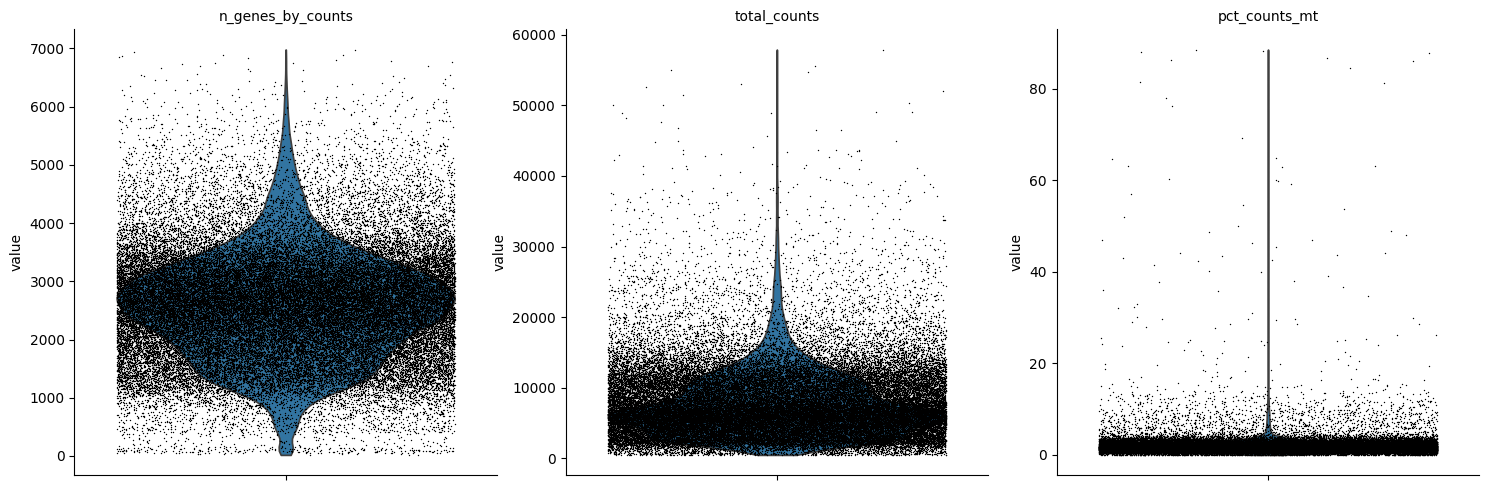

In [11]:
#violin plots of the computed QC matrix
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

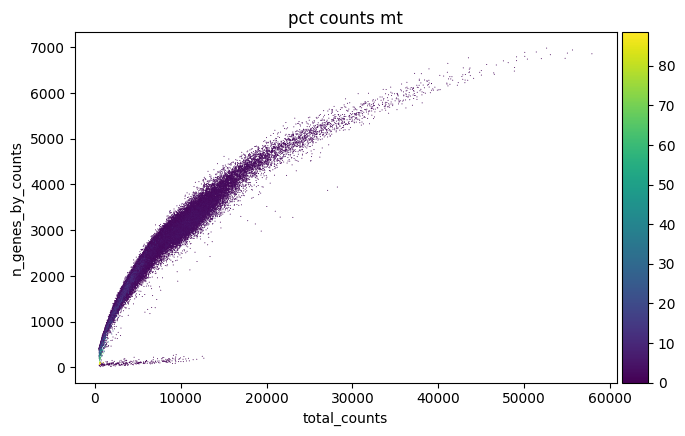

In [12]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")


In [13]:
print("Jupyter is running and responsive!")
adata

Jupyter is running and responsive!


AnnData object with n_obs × n_vars = 56054 × 32285
    obs: 'sample_id', 'batch', 'genotype', 'state', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [14]:
#actual filtering
sc.pp.filter_cells(adata, min_genes=200) #filter out cells (dying cells...?)
sc.pp.filter_genes(adata, min_cells=5) #filterout genes

adata #check how many cell and genes left


AnnData object with n_obs × n_vars = 55781 × 20567
    obs: 'sample_id', 'batch', 'genotype', 'state', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

In [15]:
adata = adata[adata.obs.n_genes_by_counts < 13000, :]
adata = adata[adata.obs.pct_counts_mt < 10, :].copy()
adata = adata[adata.obs.pct_counts_hb < 10,:].copy()

# Check the number of cells and genes after filtering
adata

AnnData object with n_obs × n_vars = 55295 × 20567
    obs: 'sample_id', 'batch', 'genotype', 'state', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

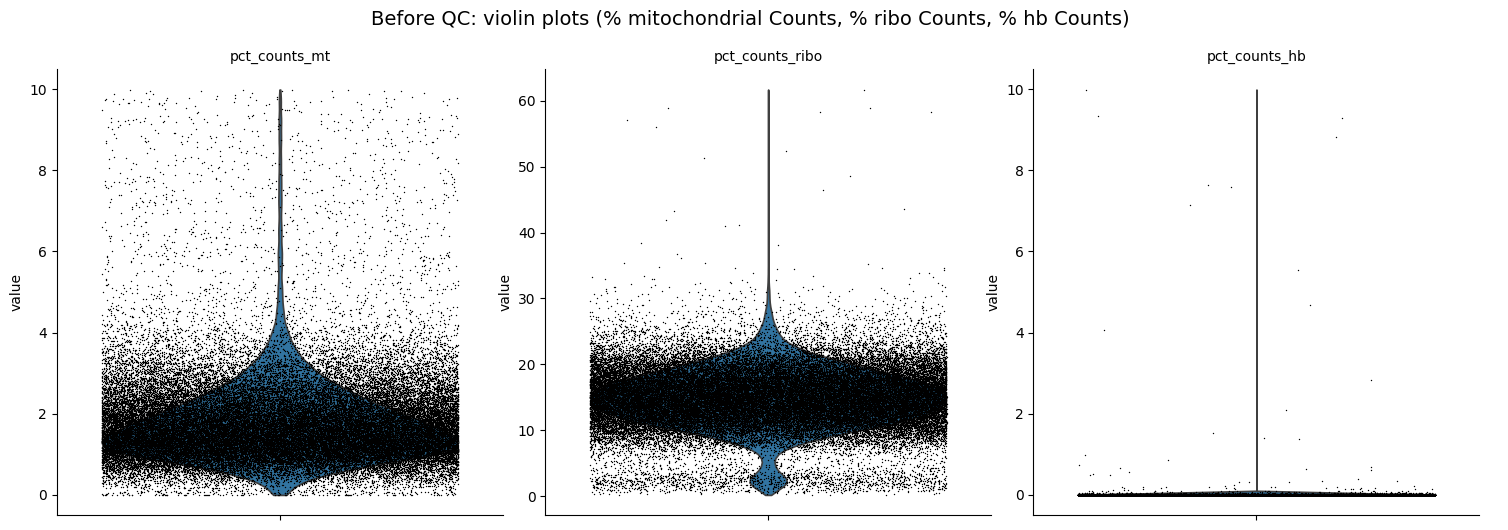

In [18]:
sc.pl.violin(
    adata,
    ["pct_counts_mt", "pct_counts_ribo", "pct_counts_hb"],
    jitter=0.4,
    multi_panel=True,
    show = False
)
# Add a summary title
title="Before QC: violin plots (% mitochondrial Counts, % ribo Counts, % hb Counts)"
plt.suptitle(title, fontsize=14, y=1.05)

#save the plots
#file_path = os.path.join(plot_dir, title)
#plt.savefig(file_path, dpi=300, bbox_inches="tight")

# Display 
plt.show()


# Display the updated figure
plt.show()


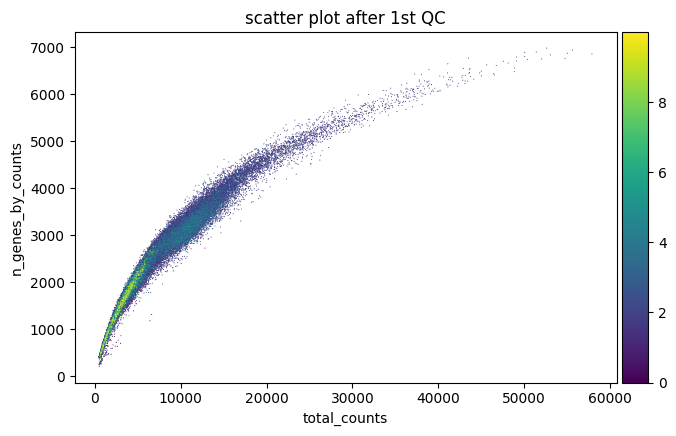

In [20]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt",
             title='scatter plot after 1st QC')

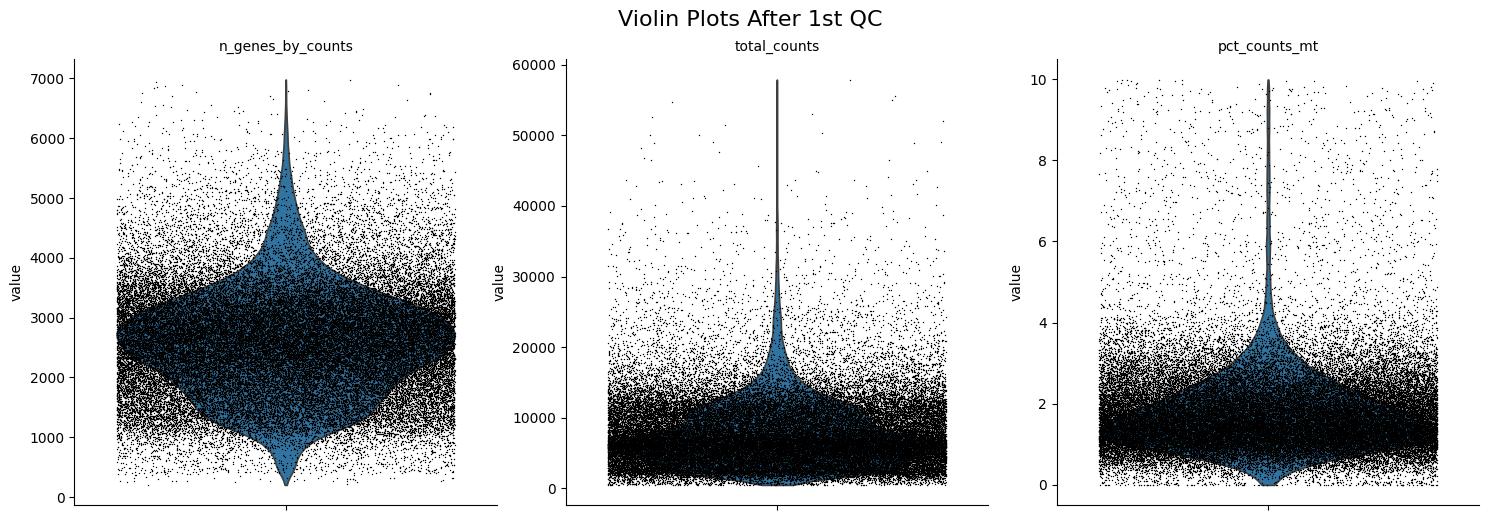

In [24]:
#violin plots after 1st QC
# Create violin plots
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
    show=False  # Prevents immediate display of the plot
)

# Add a title using Matplotlib
plt.suptitle("Violin Plots After 1st QC", fontsize=16, y =1.03)

# Display the plot
plt.show()

# Doublet Detection #

In [25]:
import skimage

In [26]:
print(adata.obs.columns)

Index(['sample_id', 'batch', 'genotype', 'state', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes',
       'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes',
       'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt',
       'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo',
       'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes'],
      dtype='object')


In [27]:
sc.pp.scrublet(adata, batch_key="sample_id") #takes very long... #do not run it again


In [29]:
#remove doublets
adata = adata[~adata.obs['predicted_doublet']].copy()  # Keep only non-doublets
adata #found srublet in adata.uns

AnnData object with n_obs × n_vars = 54975 × 20567
    obs: 'sample_id', 'batch', 'genotype', 'state', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'scrublet'

# Normalisation #
### count depth scaling with log1p transformaiton

In [30]:
#saving count data

adata.layers["counts"]=adata.X.copy()

adata

AnnData object with n_obs × n_vars = 54975 × 20567
    obs: 'sample_id', 'batch', 'genotype', 'state', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'scrublet'
    layers: 'counts'

In [31]:
#normalising to median total counts (more data-driven than arbitrary choosing a target count like normalisaing to total count)


sc.pp.normalize_total(adata)

#logarithm (natural log)
sc.pp.log1p(adata)

print(adata) #in scanpy, adata will be replaced by the new normalised_data after passing the preprocessing functions

AnnData object with n_obs × n_vars = 54975 × 20567
    obs: 'sample_id', 'batch', 'genotype', 'state', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'scrublet', 'log1p'
    layers: 'counts'


# Feature selection

In [34]:
sc.pp.highly_variable_genes(adata, min_mean =0.0125, max_mean=5, min_disp =0.5) #min_disp is the cut off

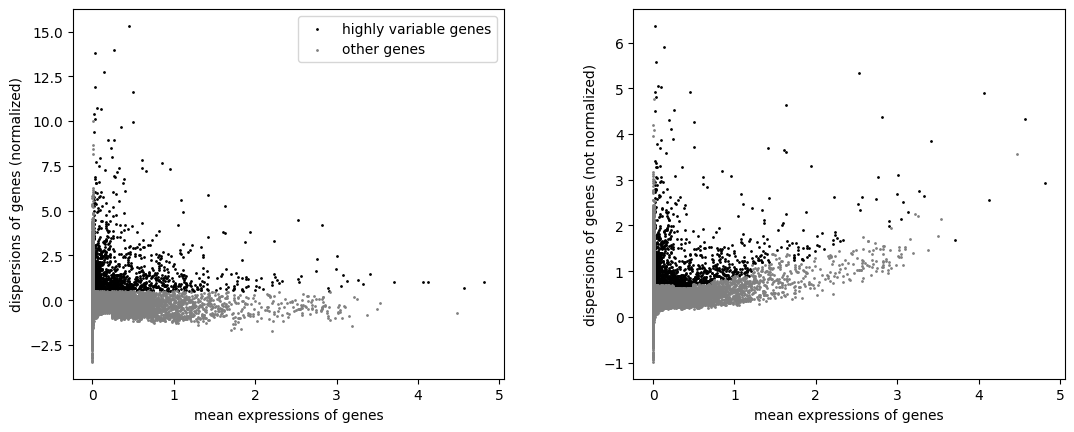

In [35]:
sc.pl.highly_variable_genes(adata)

# Dimension Reduction 
## PCA first to reduce the data to a samller set of PCs and then UMAP (so UMAP can be faster)

In [36]:
#PCA
sc.tl.pca(adata)

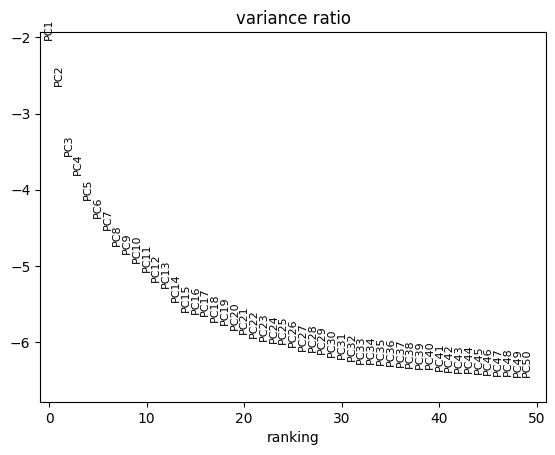

In [37]:
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)
#see ~pc50 becomes flat so 50 should be good to capture the pcs

In [38]:
adata

AnnData object with n_obs × n_vars = 54975 × 20567
    obs: 'sample_id', 'batch', 'genotype', 'state', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'scrublet', 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'

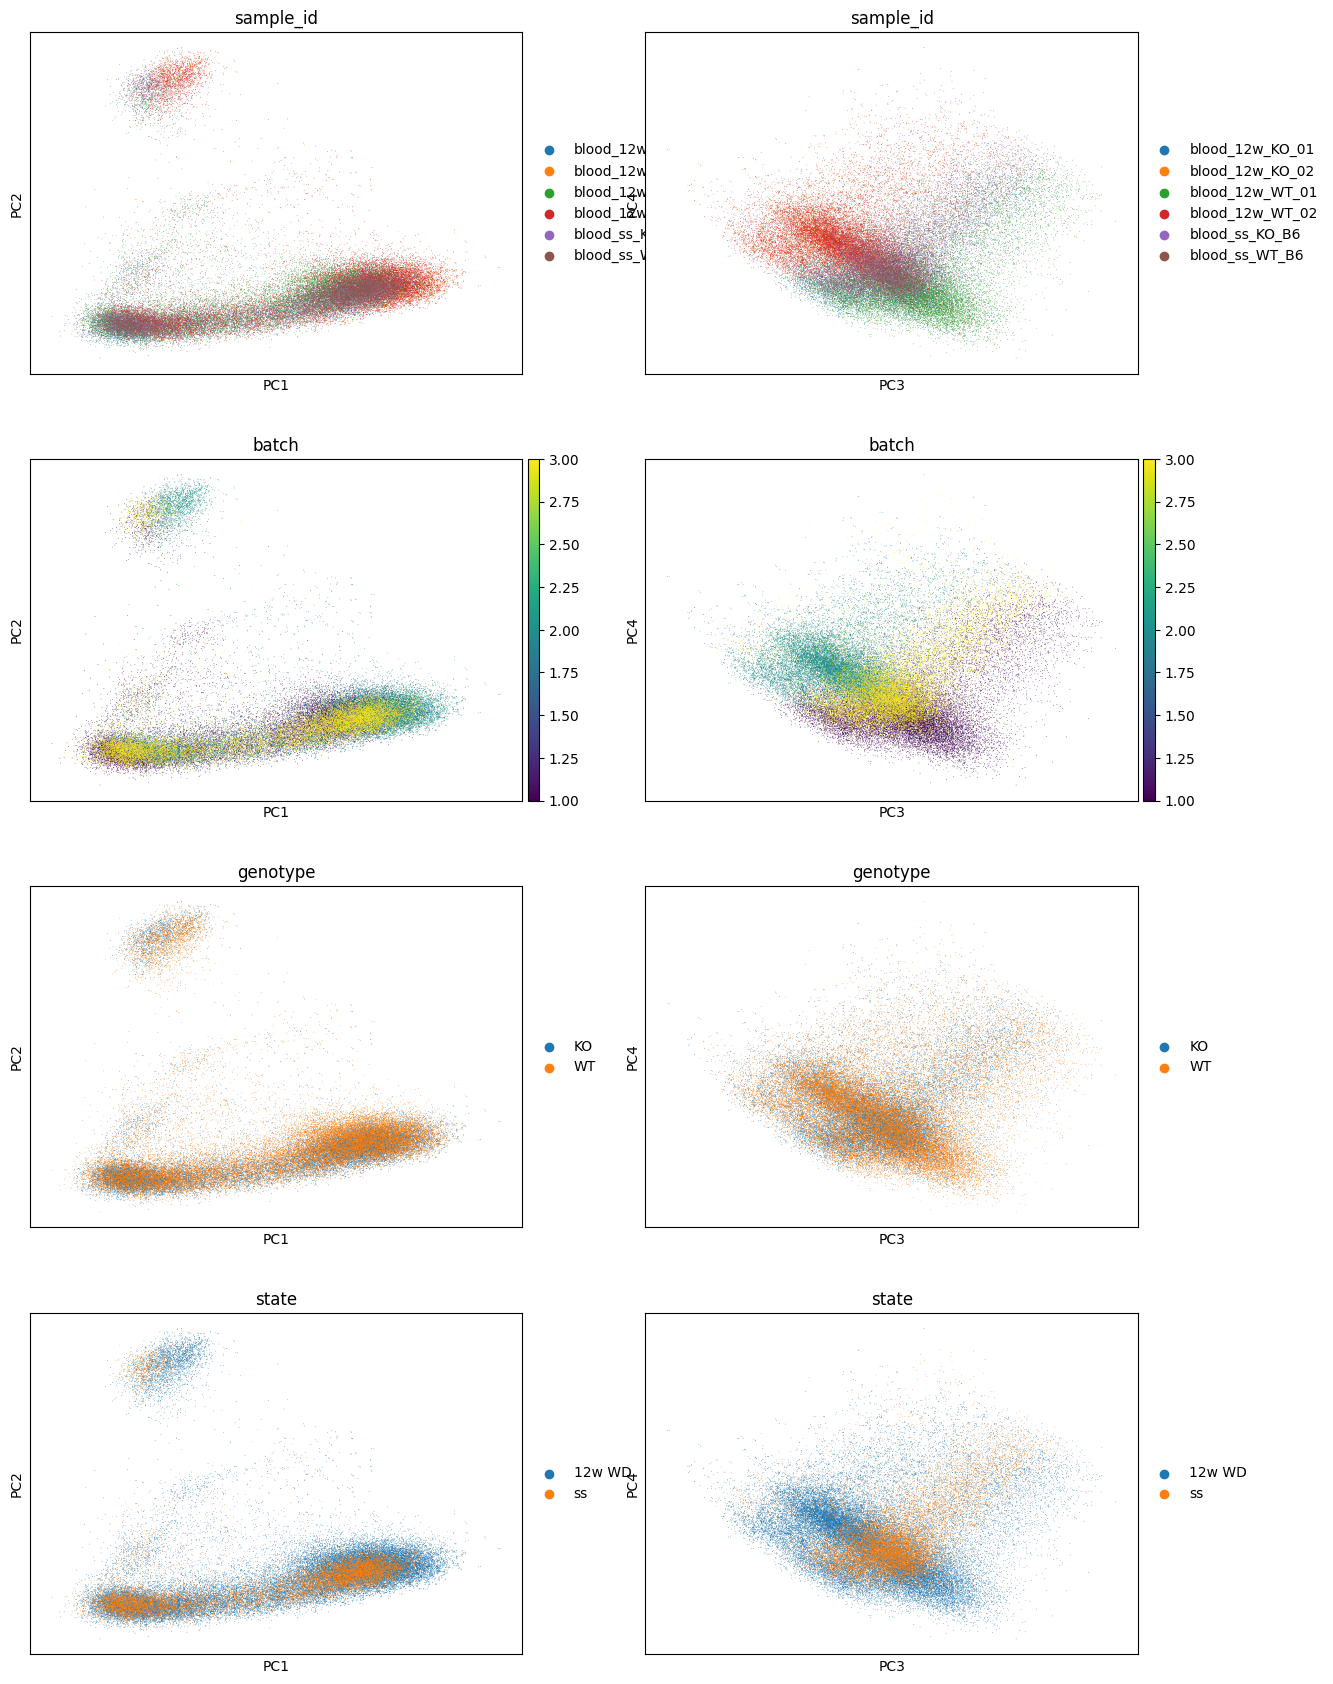

In [39]:
sc.pl.pca(
    adata,
    color=["sample_id", "sample_id", "batch", "batch", "genotype", "genotype","state","state"], #each "" specifies what PCA we want
    dimensions=[(0, 1), (2, 3), (0, 1), (2, 3), (0, 1), (2, 3),(0,1), (2,3)], #(0,1) means PC1 vs PC2, and (2,3) means PC3 vs PC4
    ncols=2,  # Two columns for the plot layout
    size=1  # Adjust point size as needed
)


In [ ]:
adata.obs.columns

In [40]:
#UMAP
sc.pp.neighbors(adata)

In [41]:
sc.tl.umap(adata)

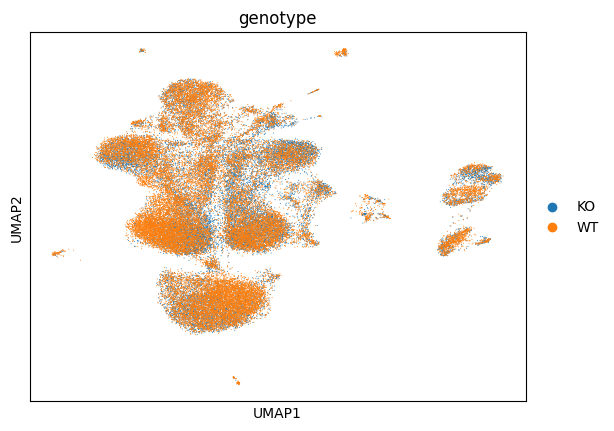

In [42]:
sc.pl.umap(
    adata,
    color="genotype",
    # Setting a smaller point size to get prevent overlap
    size=2,
)

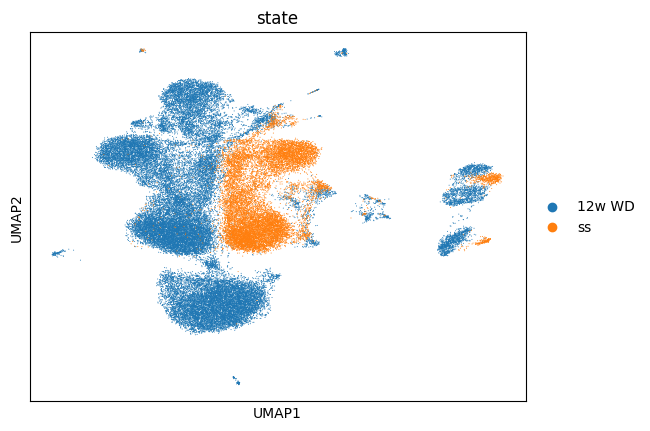

In [43]:
sc.pl.umap(
    adata,
    color="state",
    # Setting a smaller point size to get prevent overlap
    size=2,
)

## 2nd QC

In [44]:
#step1. define marker genes for filtering
monocyte = ['Itgam', 'Plac8', 'Csf1r', 'Ly6c2', 'Cx3cr1', 'Ace', 'Spn', 'Ccr2']  # Replace with relevant monocyte markers for your dataset
T_cells = ['Ly6c2','Cd3e', 'Cd3g','Cd3d']
B_cells = ['Cd79a', 'Cd79b']
NK_cells= ['Nkg7', 'Gzma']
Neutrophils= ['Itgam', 'Ly6g', 'Csf3r']
Dendritic_cells =['Itgam', 'Clec10a', 'Clec9a', 'Xcr1', 'Flt3']

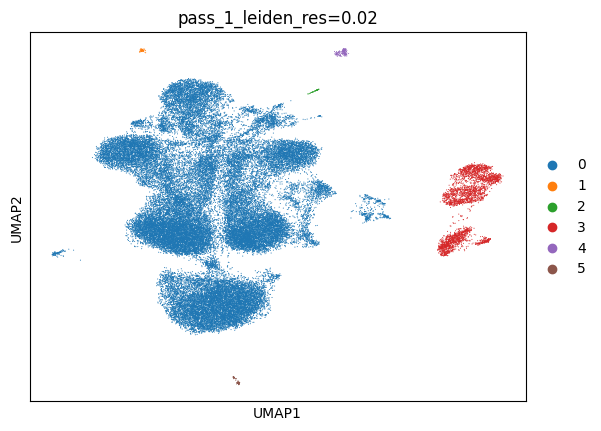

In [45]:
# Step 2: Perform Leiden clustering on the full dataset
sc.pp.neighbors(adata)  # Ensure neighbors are computed
sc.tl.leiden(adata, resolution=0.02, 
             flavor="igraph", 
             n_iterations=2, 
             directed=False)  
sc.pl.umap(adata, 
           color='leiden', 
           title='pass_1_leiden_res=0.02'
           )


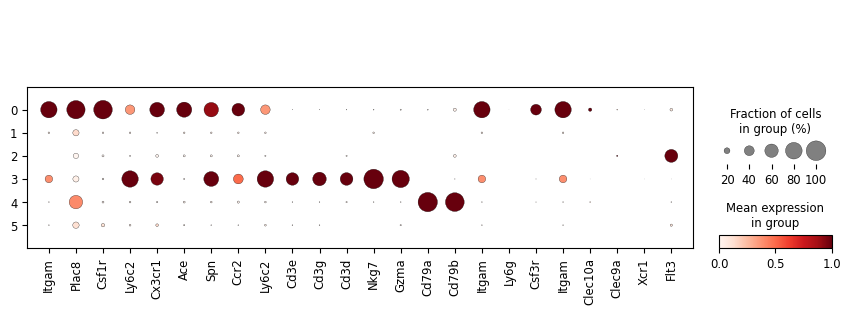

In [46]:
# Define marker genes and their corresponding cell types
gene_groups = {
    "Monocytes": ['Itgam', 'Plac8', 'Csf1r', 'Ly6c2', 'Cx3cr1', 'Ace', 'Spn', 'Ccr2'],
    "T Cells": ['Ly6c2', 'Cd3e', 'Cd3g', 'Cd3d'],
    "NK Cells": ['Nkg7', 'Gzma'],
    "B Cells": ['Cd79a', 'Cd79b'],
    "Neutrophils": ['Itgam', 'Ly6g', 'Csf3r'],
    "Dendritic Cells": ['Itgam', 'Clec10a', 'Clec9a', 'Xcr1', 'Flt3']
}

# Flatten the list of marker genes for dotplot
marker_genes = [gene for group in gene_groups.values() for gene in group]

# Create the dot plot
dotplot = sc.pl.dotplot(
    adata,
    var_names=marker_genes,
    groupby="leiden",
    standard_scale="var",
    show=False
)

# Adjust layout and display the plot
plt.show()

Original adata shape: (54975, 20567)
Subset adata shape (clusters 0): (51402, 20567)


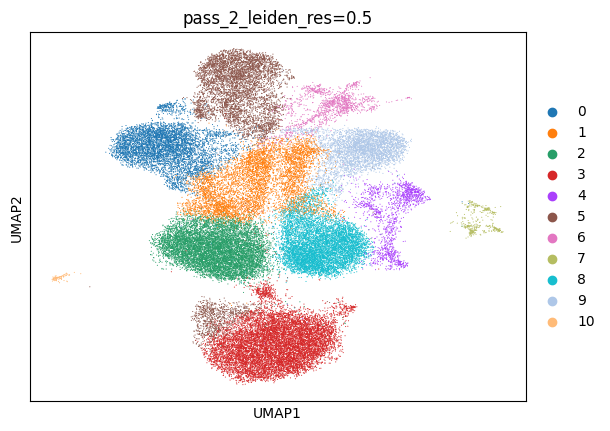

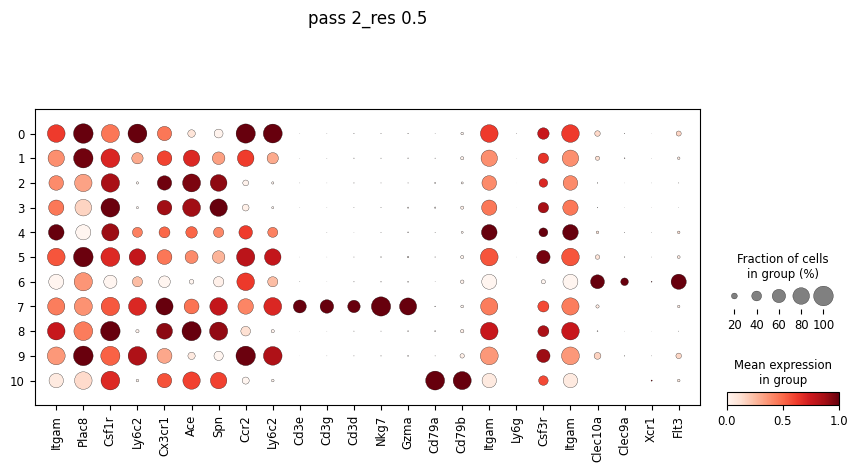

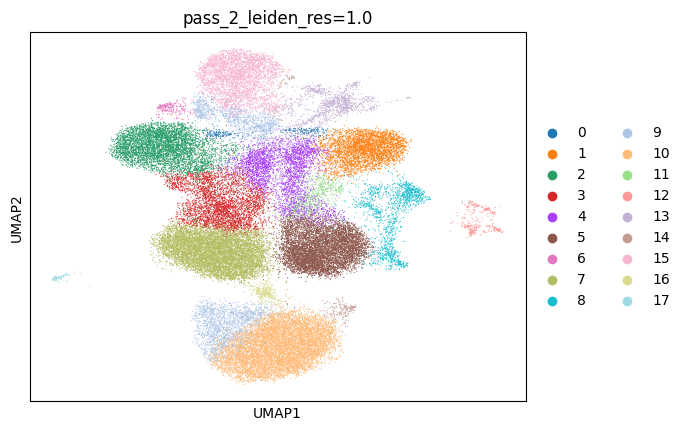

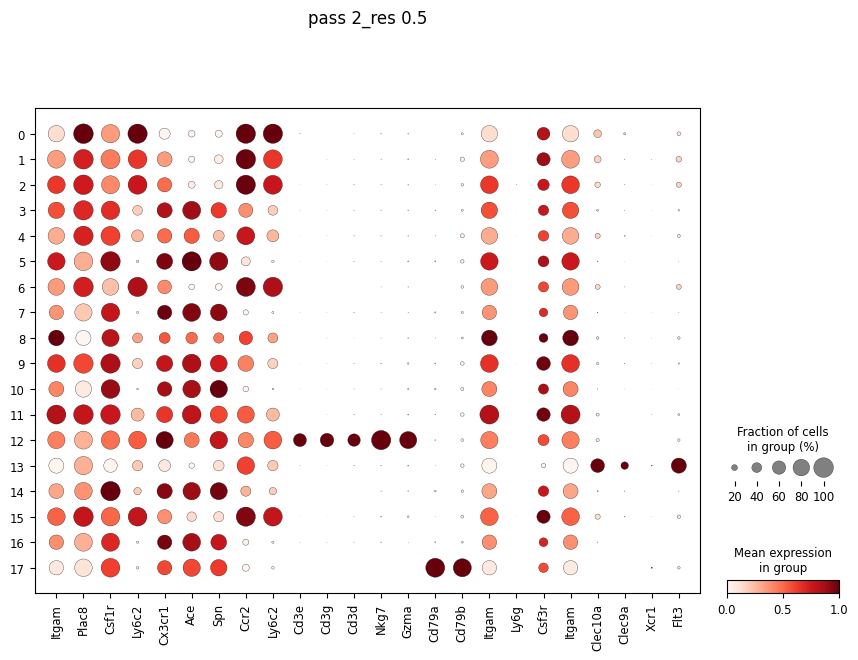

In [56]:
#select cluster 0 
 # Step 1: Subset the AnnData object to include only clusters 0 
selected_clusters = ['0']  # Specify the clusters to keep
adata_subset= adata[adata.obs['leiden'].isin(selected_clusters)].copy()

# Step 2: Verify the subset
print(f"Original adata shape: {adata.shape}")
print(f"Subset adata shape (clusters 0): {adata_subset.shape}")


#step 3 further clustering
sc.pp.neighbors(adata_subset)  # Ensure neighbors are computed
#res=0.5
sc.tl.leiden(adata_subset, resolution=0.5, 
             flavor="igraph", 
             n_iterations=2, 
             directed=False)  
sc.pl.umap(adata_subset, 
           color='leiden', 
           title='pass_2_leiden_res=0.5',
            show = False
           )
# Create the dot plot
dotplot = sc.pl.dotplot(
    adata_subset,
    var_names=marker_genes,
    groupby="leiden",
    standard_scale="var",
    show=False,
    title="pass 2_res 0.5"
)

# Adjust layout and display the plot
plt.show()

##try res=1.0
sc.tl.leiden(adata_subset, resolution=1.0, 
             flavor="igraph", 
             n_iterations=2, 
             directed=False)  
sc.pl.umap(adata_subset, 
           color='leiden', 
           title='pass_2_leiden_res=1.0',
            show = False
           )

# Create the dot plot
dotplot = sc.pl.dotplot(
    adata_subset,
    var_names=marker_genes,
    groupby="leiden",
    standard_scale="var",
    show=False,
    title="pass 2_res 0.5"
)

# Adjust layout and display the plot
plt.show()

Original adata shape: (54975, 20567)
Subset adata shape (clusters 0): (50549, 20567)


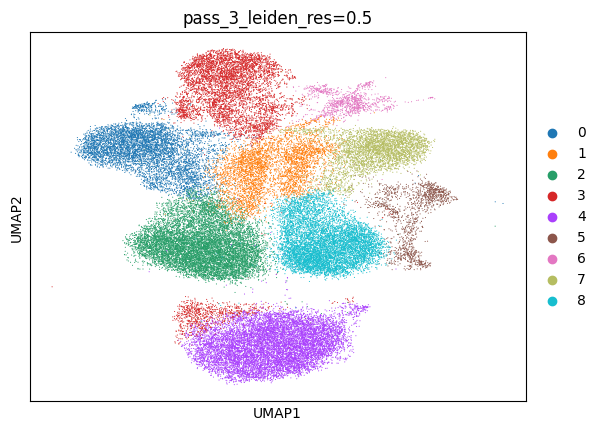

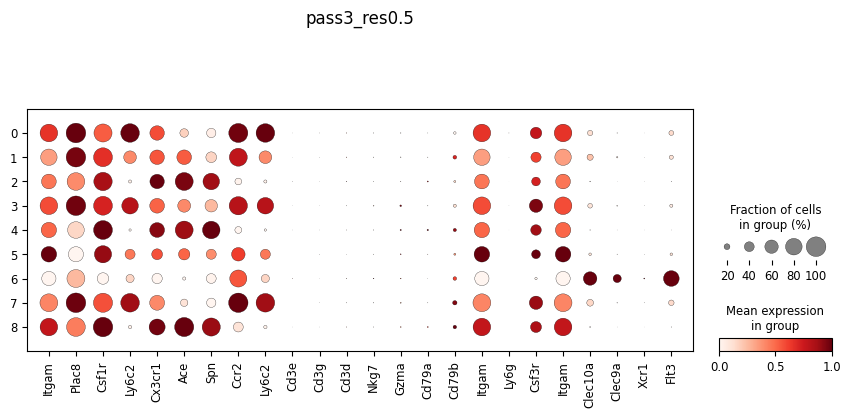

In [61]:
#select cluster 0 to 11 and 14,15, 16
 # Step 1: Subset the AnnData object again
selected_clusters2 = [str (i) for i in range (0,12)]+['13', '14','15']  # Specify the clusters to keep
adata_subset2= adata_subset[adata_subset.obs['leiden'].isin(selected_clusters2)].copy()

# Step 2: Verify the subset
print(f"Original adata shape: {adata.shape}")
print(f"Subset adata shape (clusters 0): {adata_subset2.shape}")


#step 3 further clustering
sc.pp.neighbors(adata_subset2)  # Ensure neighbors are computed
sc.tl.leiden(adata_subset2, resolution=0.5, 
             flavor="igraph", 
             n_iterations=2, 
             directed=False)  
sc.pl.umap(adata_subset2, 
           color='leiden', 
           title='pass_3_leiden_res=0.5'
           )

# Create the dot plot
dotplot = sc.pl.dotplot(
    adata_subset2,
    var_names=marker_genes,
    groupby="leiden",
    standard_scale="var",
    show=False,
    title="pass3_res0.5"
)

# Adjust layout and display the plot
plt.show()

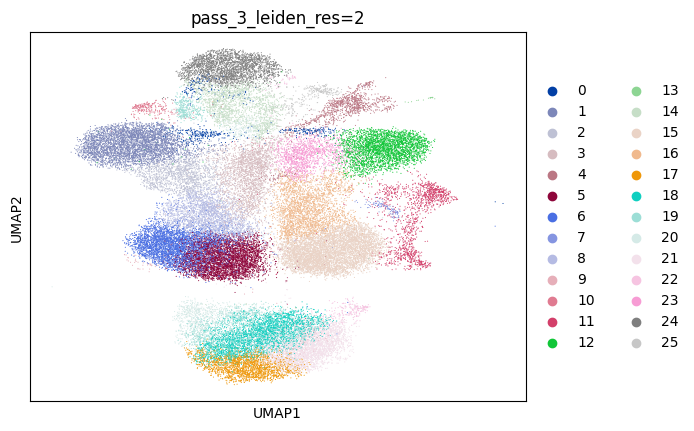

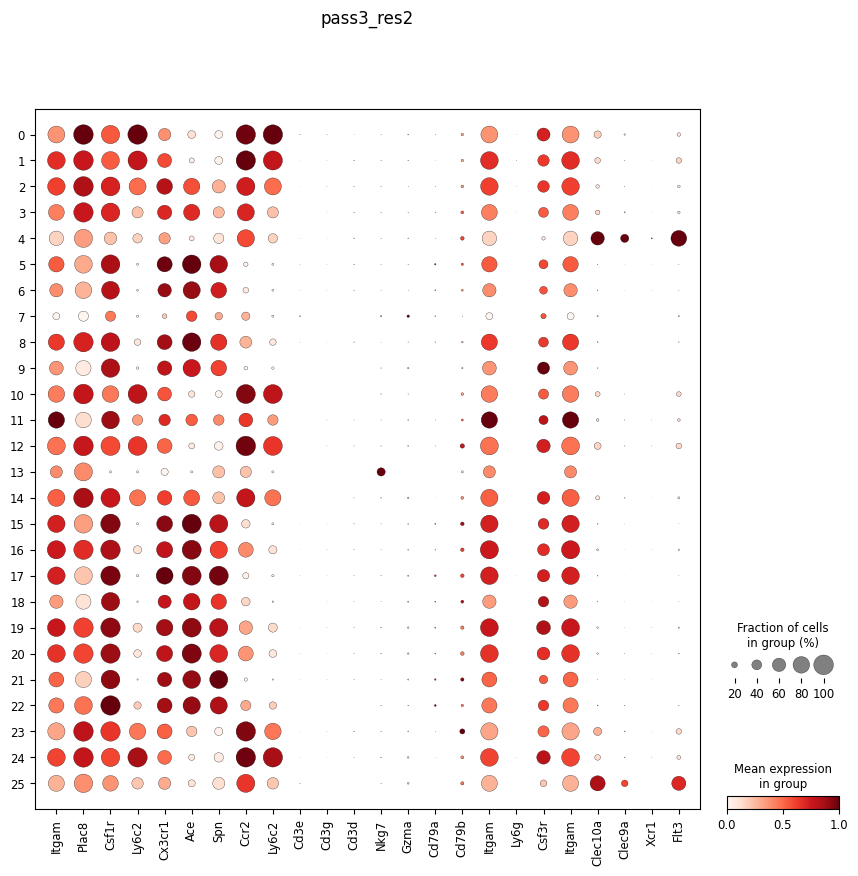

In [62]:
#after pass 3 seems like all are monocytes now except for cluster 6
#would like to further check
#raise resolution to 2.0
sc.pp.neighbors(adata_subset2)  # Ensure neighbors are computed
sc.tl.leiden(adata_subset2, resolution=2, 
             flavor="igraph", 
             n_iterations=2, 
             directed=False)  
sc.pl.umap(adata_subset2, 
           color='leiden', 
           title='pass_3_leiden_res=2'
           )

# Create the dot plot
dotplot = sc.pl.dotplot(
    adata_subset2,
    var_names=marker_genes,
    groupby="leiden",
    standard_scale="var",
    show=False,
    title="pass3_res2"
)

# Adjust layout and display the plot
plt.show()

##cluster 8 seems like non monocytes, remove

In [68]:
#Now it's pass 4
#remove cluster 4 from pass 3_res 2.0
selected_clusters3 = [str (i) for i in range (0,26) ] # Specify the clusters to keep
selected_clusters3.remove("4")

adata_subset3= adata_subset2[adata_subset2.obs['leiden'].isin(selected_clusters3)].copy()
adata_subset3.shape #49494 cells and 20567 genes left

(49494, 20567)

In [69]:
adata=adata_subset3 #clean monocyte data only

## Integration

In [70]:
import bbknn

[1 2 3]


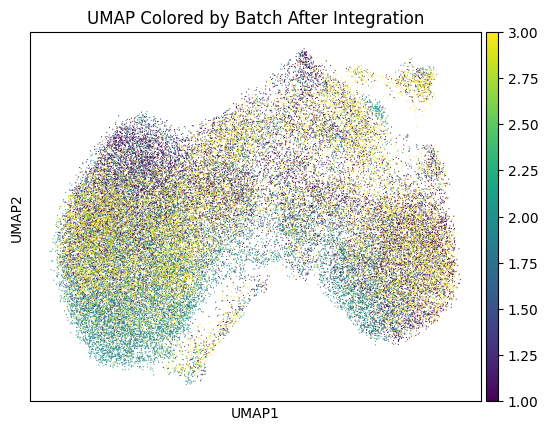

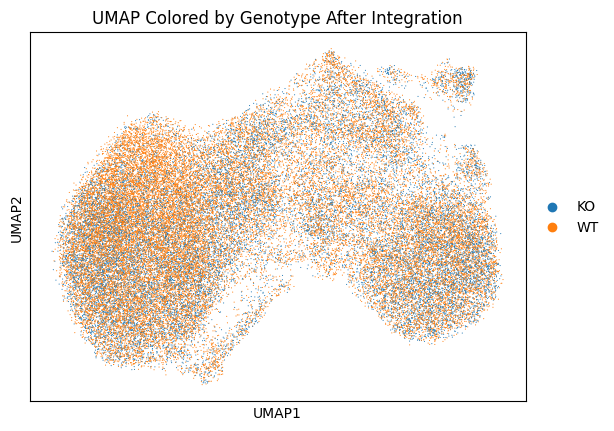

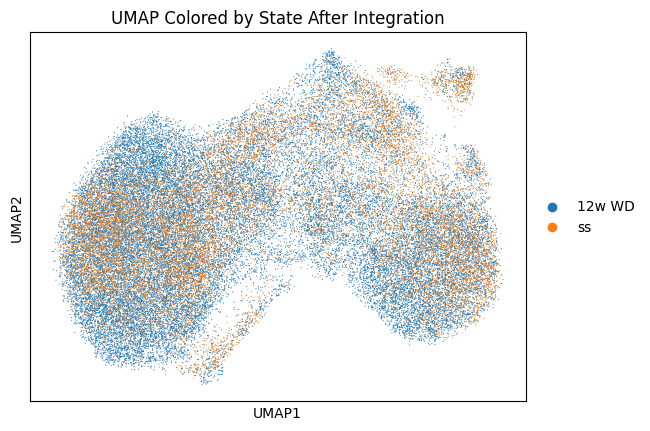

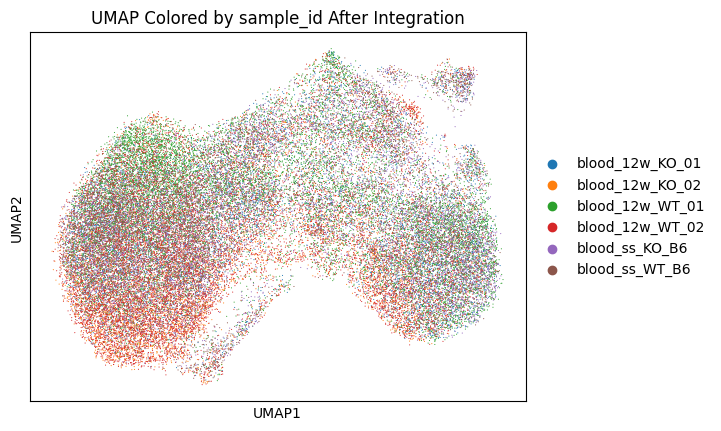

In [83]:
# Step 1: Ensure batch information is present
print(adata.obs['batch'].unique())  # Confirm the 'batch' column exists in `adata.obs`

# Step 2: Run BBKNN for batch effect correction
bbknn.bbknn(adata, batch_key='batch', n_pcs=50)  # Use 'batch' key from adata.obs

# Step 3: Recompute UMAP for integrated data visualization
sc.tl.umap(adata)

# Step 4: Visualize integration results
# Plot UMAP colored by batch to confirm successful integration
sc.pl.umap(adata, color='batch', title="UMAP Colored by Batch After Integration")

# Plot UMAP colored by genotype
sc.pl.umap(adata, color='genotype', title="UMAP Colored by Genotype After Integration")

# Plot UMAP colored by State
sc.pl.umap(adata, color='state', title="UMAP Colored by State After Integration")
# Plot UMAP colored by sample id
sc.pl.umap(adata, color='sample_id', title="UMAP Colored by sample_id After Integration")

## Find the subsets of monocytes


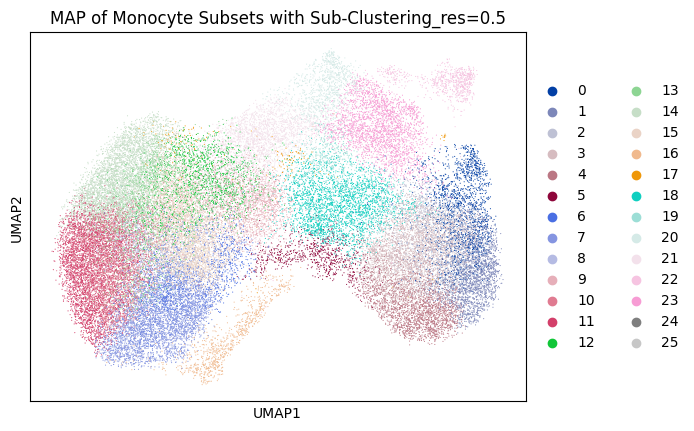

In [75]:
# Run Leiden clustering
sc.tl.leiden(adata, resolution=2, 
             flavor="igraph", 
             n_iterations=2, 
             directed=False)  
sc.pl.umap(adata, 
           color='leiden', 
           title='MAP of Monocyte Subsets with Sub-Clustering_res=0.5'
           )